# About Dataset
Context

This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

### Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

### Content

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Inspiration

Generate any inference of the dataset.

In [1]:
#import required packages
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Automobile_data.csv")

# take a look at the dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# summarize the data
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
normalized-losses,205,52,?,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,3,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,205,NaN,NaN,NaN,98.7566,6.02178,86.6,94.5,97,102.4,120.9


In [6]:
#check for null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
nulls=df.isnull().sum()
print(nulls[nulls > 0])

Series([], dtype: int64)


In [9]:
df.replace('?', np.nan, inplace = True)
#replace "?" with nan

In [10]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)
#convert object datatypes to numeric after dealing with nan above

In [11]:
# Removing all rows with '?'
print(f"Subset Cleaned already '?': {len(df[(df != '?').all(axis=1)].index)/len(df.index)*100:.2f}%")

Subset Cleaned already '?': 100.00%


In [12]:
df[df['num-of-doors'].isnull()]
#Fill missing values in "number of doors" column

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [13]:
# get all data points having sedan body style and dodge and mazda make.
df[(df['body-style']=='sedan')  & ((df['make']=='dodge') | (df['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [14]:
#replace the missing 'num-of-doors' values by 'four' 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [15]:
# get all rows with null values in 'horsepower' column
df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [16]:
# get all rows with null values in 'horsepower' column
df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [17]:
#For NaN values in "horsepower", engine size is 132, so we will use range between 127 and 137.
df[(df['engine-size'] > 127) & (df['engine-size'] < 137)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
117,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0


In [18]:
#
df[((df['fuel-type'] == 'gas') & (df['aspiration'] == 'std')) 
     & ((df['engine-size'] > 127) & (df['engine-size'] < 137))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,24,13295.0


In [19]:
# from above observations replacing missing value with 112 for horsepower
df["horsepower"].replace(np.nan, 112, inplace=True)

In [20]:
# from above observations replacing missing value with 5100 for peak-rpm
df["peak-rpm"].replace(np.nan, 5100, inplace=True)

In [21]:
# from above observations replacing missing value with 3.39 for Bore
df["bore"].replace(np.nan, 3.39, inplace=True)

In [22]:
# from above observations replacing missing value with 3.39 for stroke
df["stroke"].replace(np.nan, 3.39, inplace=True)

In [23]:
# getting median value
median = df['normalized-losses'].median()


In [24]:
# from above observations replacing missing value with median
df["normalized-losses"].replace(np.nan, median, inplace=True)

In [25]:
data_without_price = df[df['price'].isnull()]

In [26]:
# drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

In [27]:
df.isnull().values.any()
#check for any nan

False

In [28]:
df0 = df 


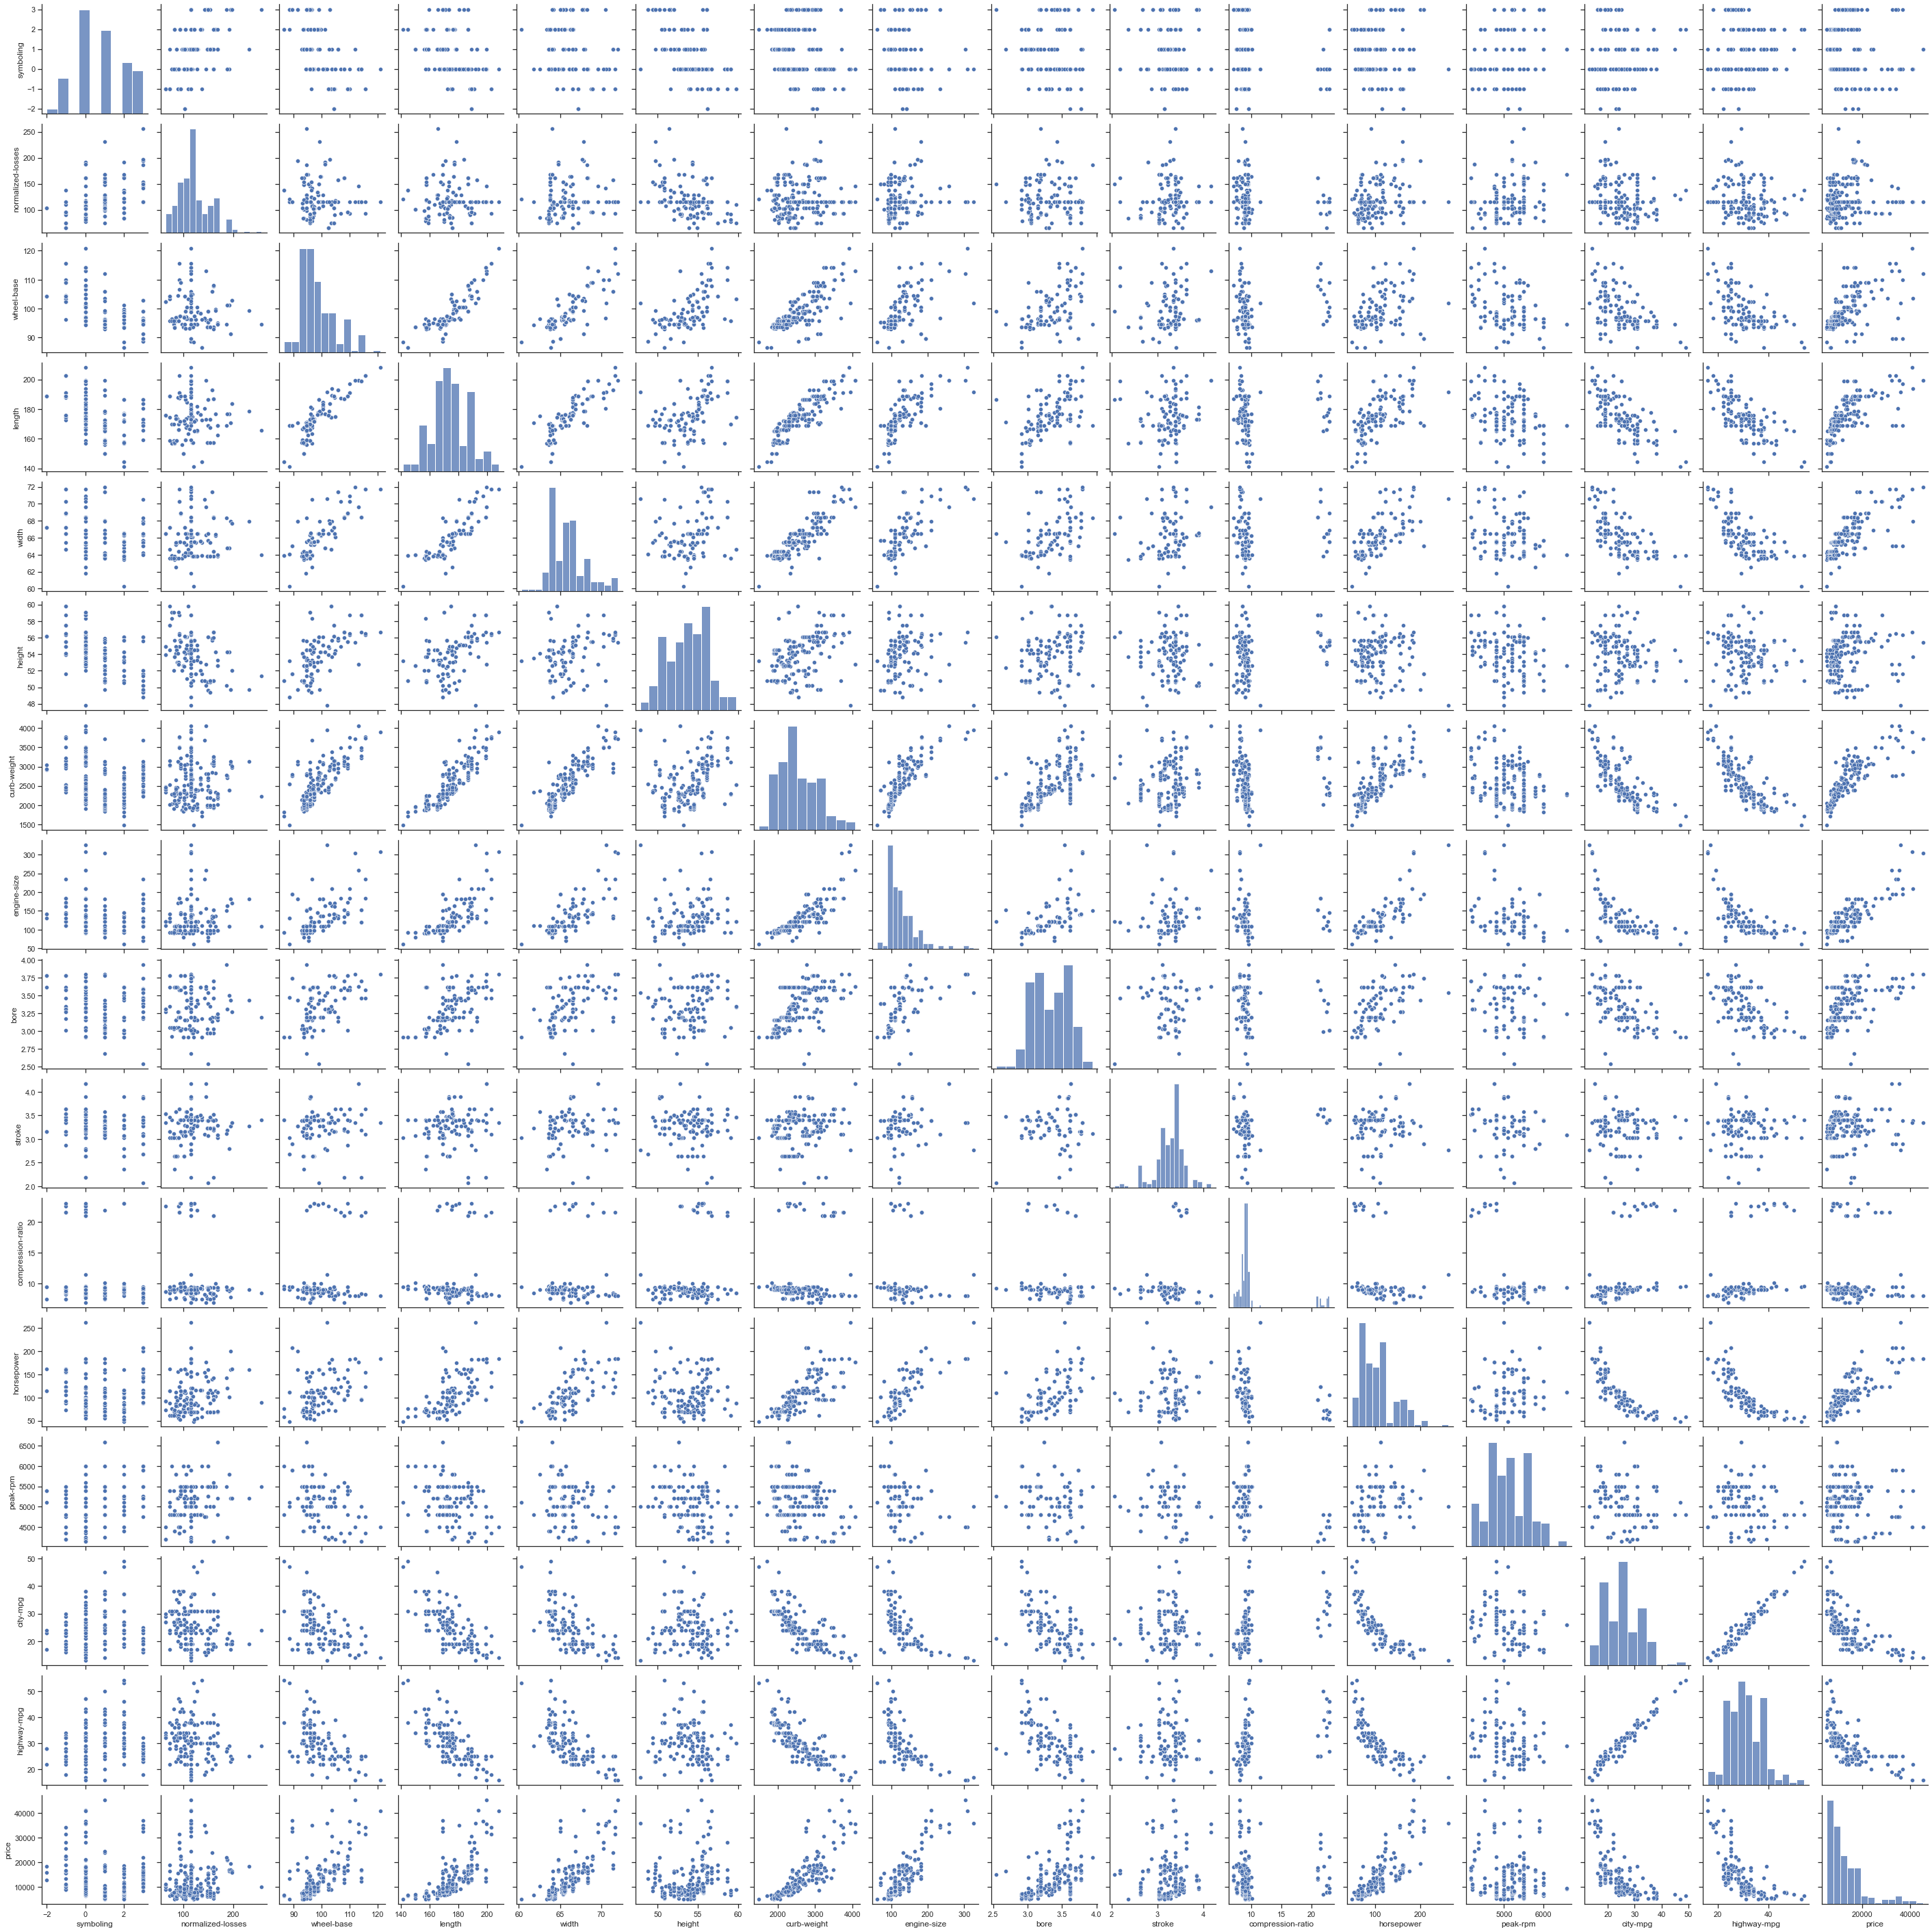

In [29]:
#EDA
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df0)
plt.show()

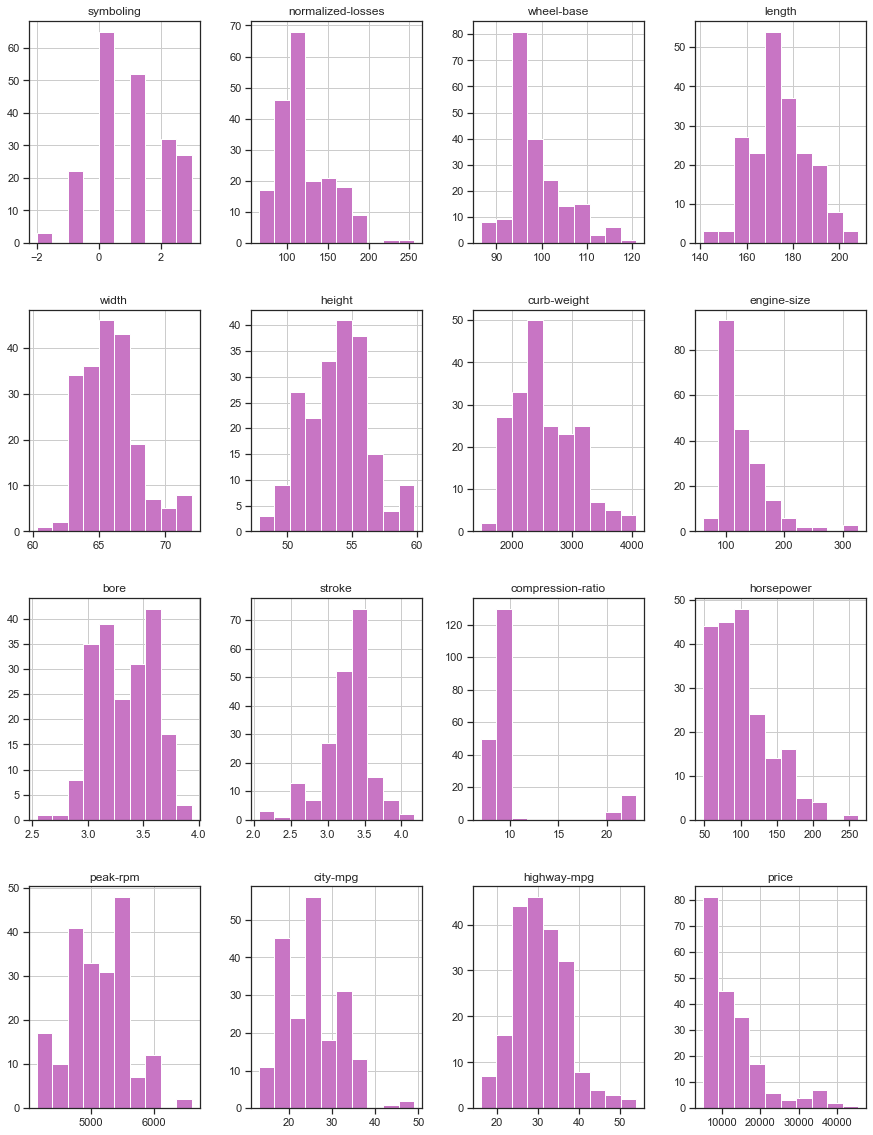

In [30]:
df0.hist(figsize=(15,20),color= '#C875C4')
plt.show()

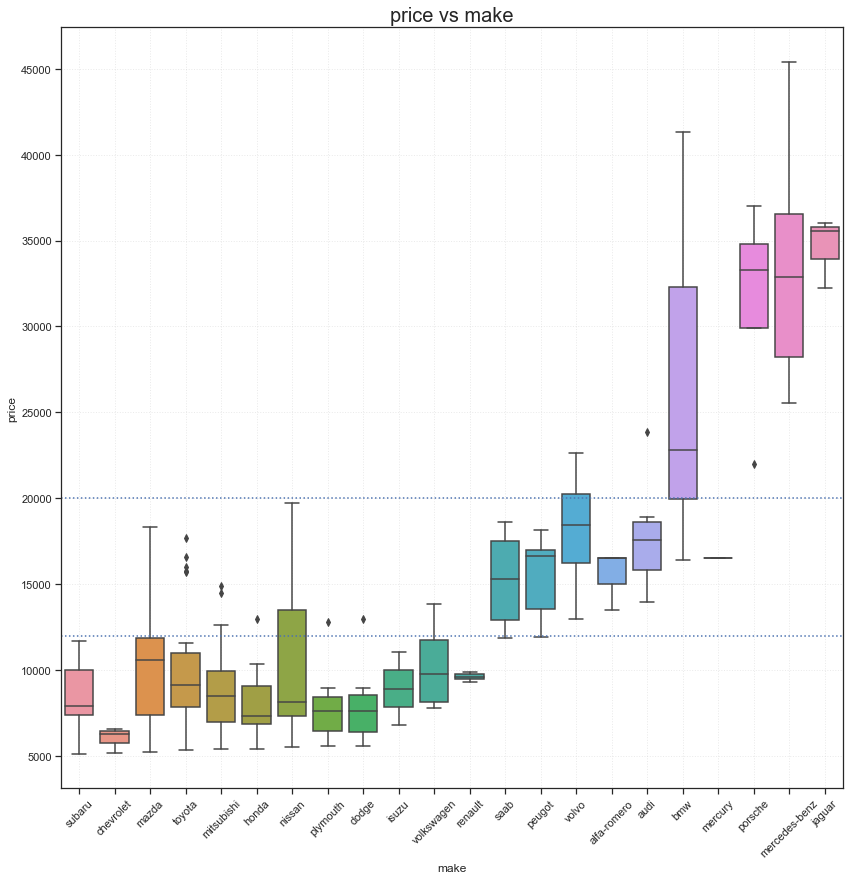

In [31]:
_, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(x='make', y="price", data=pd.concat([df0['price'], df0['make']], axis=1).sort_values(by = "price"))
ax.axhline(y = 20_000,  linestyle = ':' )
ax.axhline(y = 12_000, linestyle = ':' )
plt.grid(True, alpha = 0.4, linestyle = ':')
plt.xticks(rotation=45)
plt.title("price vs make", fontsize = 20)
plt.show()
#boxplot on Income of Users by product


toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64


/Users/paulinusjua/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


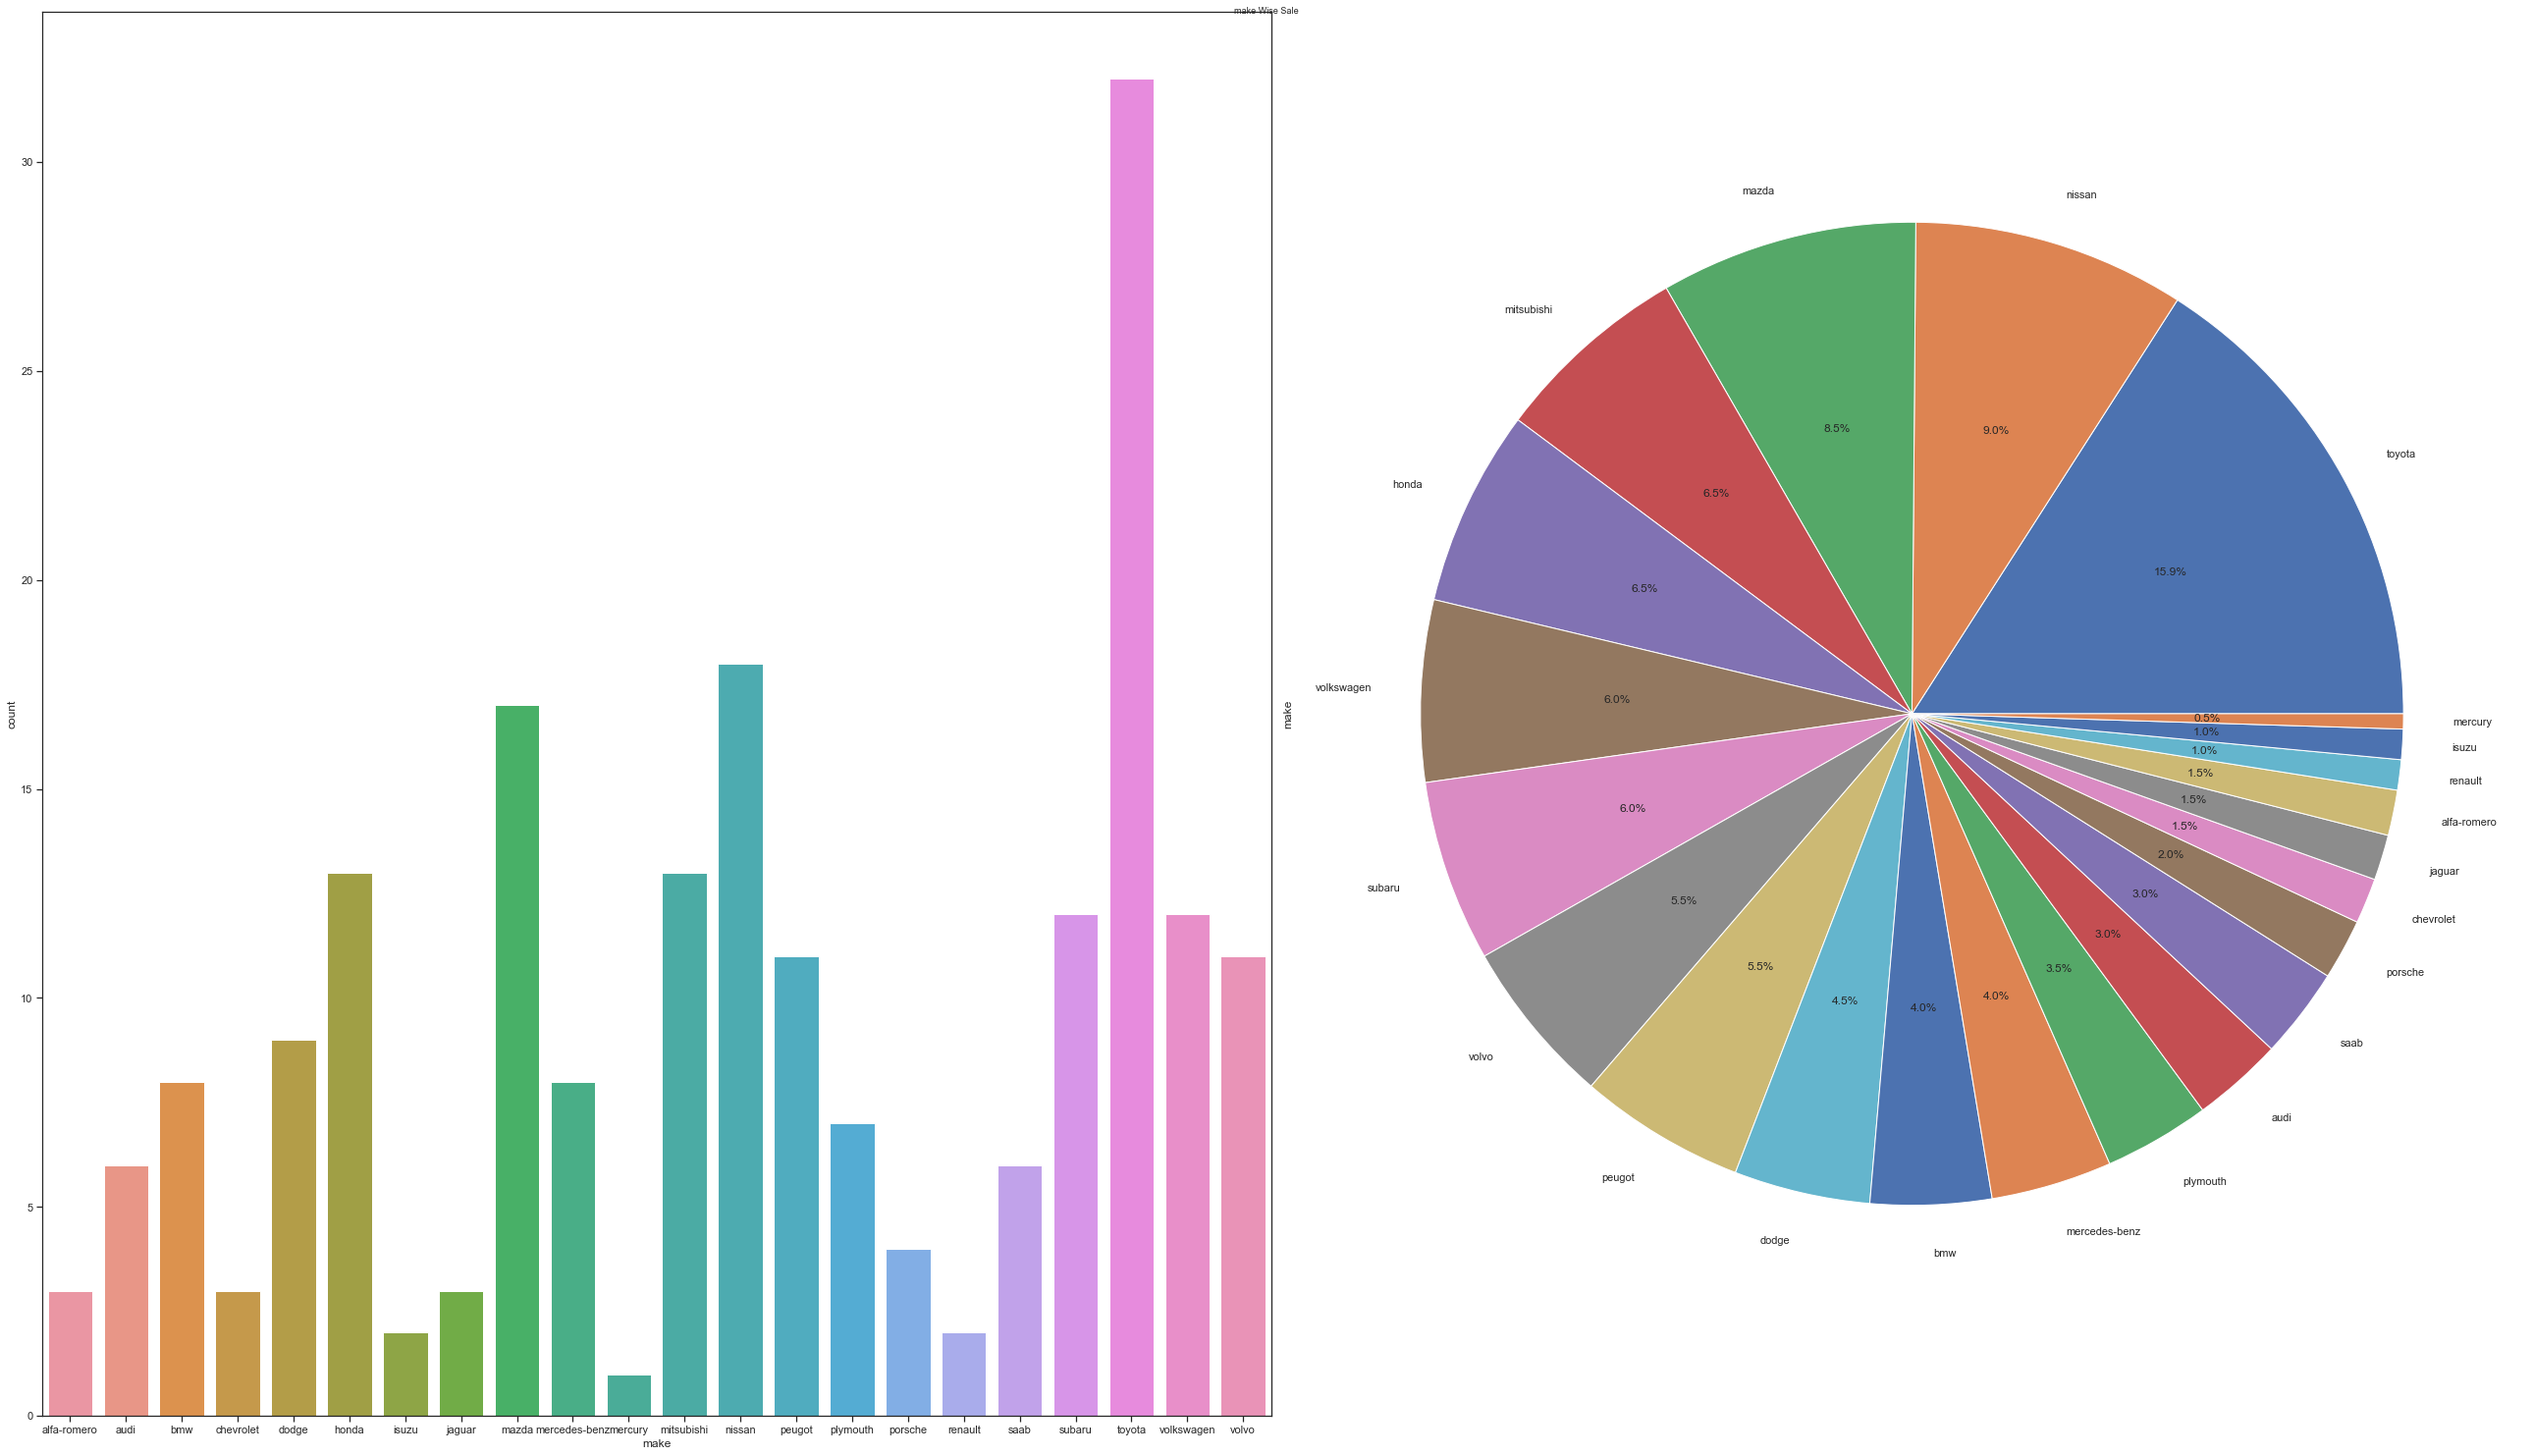

In [32]:
#users count by product name
print(df0.make.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(36,21))
    f.suptitle(d.name+' Wise Sale',fontsize=9)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(df0['make'])

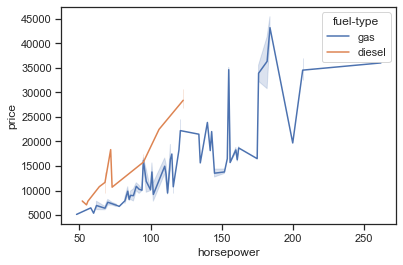

In [33]:
sns.lineplot(data=df0, x='horsepower', y='price', hue="fuel-type")
plt.show()
#Horsepower versuS Price by fuel type

In [34]:
#Correlation Matrix
corr = df0.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.132221,0.006490,-0.182196,0.076062,0.279671,-0.035527,0.036233,-0.082391
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.046631,0.051711,-0.115967,0.181668,0.246305,-0.193896,-0.150773,0.094366
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.490418,0.152843,0.250313,0.370129,-0.360067,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.606783,0.120149,0.159733,0.580503,-0.286181,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544220,0.187730,0.189867,0.615569,-0.245966,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.172715,-0.075029,0.259737,-0.087780,-0.309774,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.642498,0.164774,0.156433,0.757634,-0.279322,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.566455,0.194445,0.028889,0.822718,-0.256797,-0.650546,-0.679571,0.872335
bore,-0.132221,-0.046631,0.490418,0.606783,0.544220,0.172715,0.642498,0.566455,1.000000,-0.053446,0.000405,0.568239,-0.259224,-0.587644,-0.596093,0.542789
stroke,0.006490,0.051711,0.152843,0.120149,0.187730,-0.075029,0.164774,0.194445,-0.053446,1.000000,0.185923,0.103649,-0.048835,-0.045054,-0.044164,0.081926


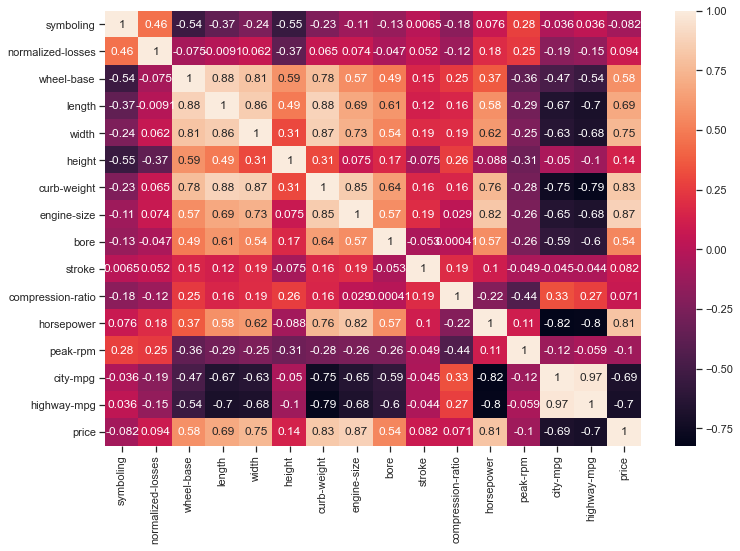

In [35]:
#corr matrix graph
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor

In [37]:
x=df0.drop(['price','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
            'engine-location','engine-type','num-of-cylinders','fuel-system'], axis=1)
y=df0[['price']]

In [38]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), 
        KNeighborsRegressor(), DecisionTreeRegressor()]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state = 15)
#split data into training and test data

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#data standardization

In [41]:
from sklearn import metrics
import sklearn.metrics as sm

def reg_models(x, y, models):
    for model in models:

        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Mean Squared Error: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
        print('Regression Score(r2): {}'.format(r2_score(Y_test, Y_test_pred),))
        print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_test_pred), 3)) 
        print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_test_pred), 3)) 
        print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_test_pred), 3)) 
        print('-----------------------------------------------------')

In [42]:
reg_models(x, y, models)

LinearRegression()
Mean Squared Error: 8082547.889844783
Regression Score(r2): 0.8039875442946394
Explain variance score = 0.805
Mean absolute error = 2198.589
Median absolute error = 1540.698
-----------------------------------------------------
Lasso()
Mean Squared Error: 8095438.408334157
Regression Score(r2): 0.8036749322051283
Explain variance score = 0.805
Mean absolute error = 2201.557
Median absolute error = 1517.984
-----------------------------------------------------
Ridge()
Mean Squared Error: 8165216.122169008
Regression Score(r2): 0.8019827305344819
Explain variance score = 0.803
Mean absolute error = 2201.999
Median absolute error = 1593.997
-----------------------------------------------------
ElasticNet()
Mean Squared Error: 9115351.964127248
Regression Score(r2): 0.7789406821390852
Explain variance score = 0.789
Mean absolute error = 2162.778
Median absolute error = 1736.603
-----------------------------------------------------
KNeighborsRegressor()
Mean Squared Error

### Mean absolute error: 
This is the average of absolute errors of all the data points in the given dataset.
### Mean squared error: 
This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
### Median absolute error: 
This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
### Explained variance score: 
This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
### Regression Score - R2 score: 
This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well. This can also be seen as the model accuracy for test data.

###### Source of definitions https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy